<div style="text-align: center; padding: 20px; background-color: #f0f8ff; border-radius: 15px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 2.5em; color: #4CAF50;">Welcome to the Journey! 🚀</h1>
    <p style="font-size: 1.2em; color: #555;">
        This notebook is your guide to understanding and working with <strong>image datasets</strong> on Kaggle! 🖼️
        Whether you're a beginner or an expert, you'll find something valuable here. 🌟
    </p>
    <p style="font-size: 1.1em; color: #555;">
        Together, we’ll explore how to load, visualize, and analyze datasets effectively using TensorFlow. 💻✨
    </p>
    <div style="margin-top: 20px;">
        <a href="#h" style="text-decoration: none; padding: 10px 20px; font-size: 1.2em; color: white; background: linear-gradient(45deg, #4CAF50, #81C784); border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
            ⭐ Let's Get Started! ⭐
        </a>
    </div>
    <p style="font-size: 1em; color: #777; margin-top: 20px;">
        Ready to dive in? Let’s make some magic with data! ✨🎨
    </p>
</div>


## Setting Up the Essentials 📦

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

## grapevine-leaves-image-dataset

In [2]:
data_path_1 = '/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset'

## Exploring the Dataset 🧐

To better understand our datasets, we define a handy function called `show_data_info`. This function provides:

- The **number of batches** in the dataset. 📦
- The **shape of image batches** (useful for debugging and understanding the dataset structure). 🖼️
- The **shape of label batches**. 🔖
- (Optional) The **class names** if available in the dataset. 🏷️

In [3]:
def show_data_info(data, show_name=True):
    print("batch number:", tf.data.experimental.cardinality(data).numpy())

    for images, labels in data.take(1):
        print("Image batch shape:", images.shape)
        print("Label batch shape:", labels.shape)
        
    if(show_name):
        print(data.class_names)

## Loading the Image Dataset 🖼️

Here, we demonstrate how to load an image dataset from a directory using TensorFlow's `image_dataset_from_directory`. This function helps split your dataset into **training** and **validation** subsets effortlessly. 🚀

### Key Parameters Used:

- **`directory`**: The path to the dataset directory. 📂
- **`label_mode`**: Specifies how labels are returned. In this case, labels are integers (`'int'`). 🔢
- **`batch_size`**: Number of samples per batch. We use a batch size of `32`. 📦
- **`image_size`**: The target size to which images will be resized (`224x224`). ✂️
- **`shuffle`**: Controls whether the data is shuffled. Training data is shuffled, but validation data is not. 🔄
- **`seed`**: A fixed seed ensures reproducibility of data shuffling and splitting. 🌱
- **`validation_split`**: Proportion of the dataset reserved for validation (20%). 🔍
- **`subset`**: Defines which subset to load — `'training'` or `'validation'`. ✅

### Why These Choices? 🤔

- **Shuffling training data**: Helps improve model training by introducing randomness. 🎲
- **Fixed seed**: Ensures consistency across multiple runs for reproducibility. 🔁
- **Separate validation data**: Prevents data leakage and ensures unbiased evaluation. 🚧

Once loaded, you can use these datasets to train and validate your deep learning model. 📈


In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
    directory=data_path_1,
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,  # Shuffle training data
    seed=42,
    validation_split=0.2,
    subset='training',
    verbose=True,
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    directory=data_path_1,
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,  # NOT Shuffle validation data
    seed=42,
    validation_split=0.2,
    subset='validation',
    verbose=True,
)

Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [5]:
show_data_info(train_data)
print('-------------------------------------')
show_data_info(validation_data)

batch number: 13
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)
['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']
-------------------------------------
batch number: 4
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)
['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']


## Visualizing the Dataset 📸


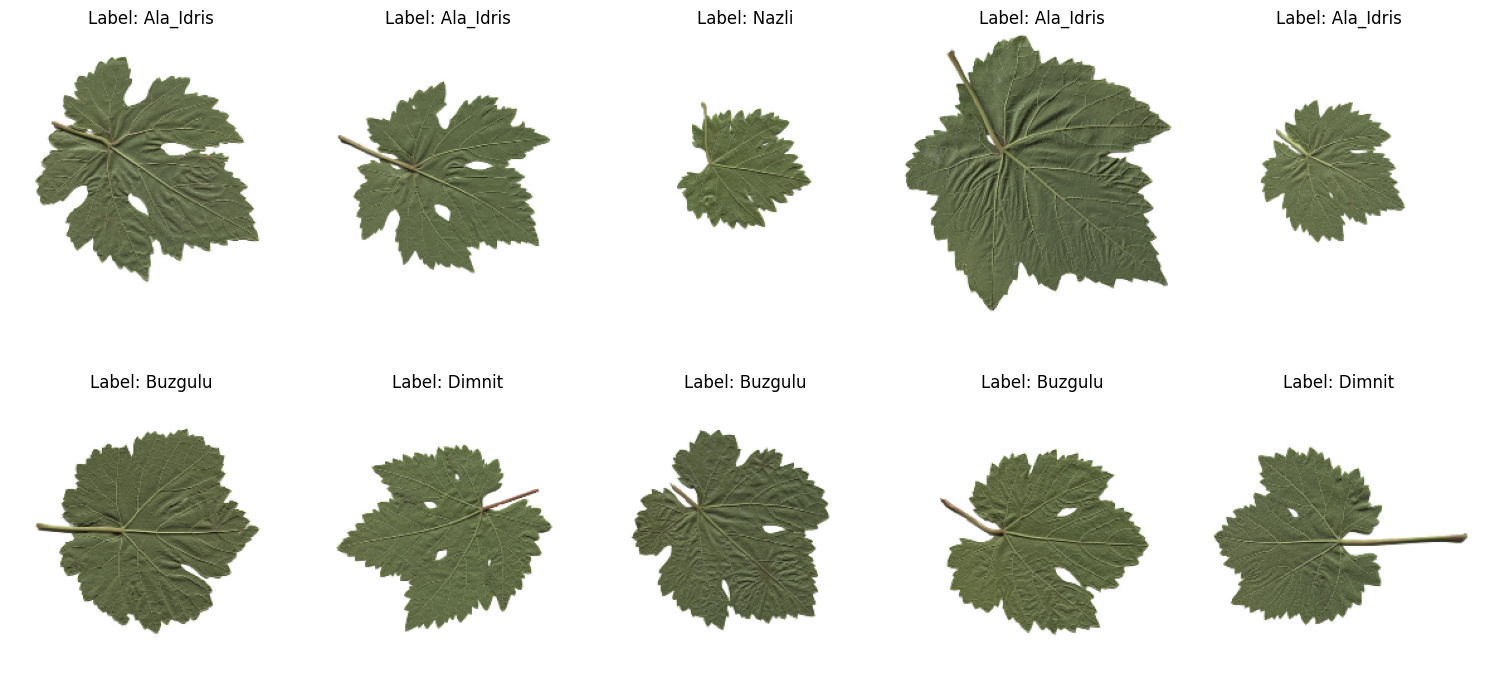

In [6]:
images, labels = next(iter(train_data))

plt.figure(figsize=(15, 8))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))  # Convert to uint8 for display
    plt.title(f"Label: {train_data.class_names[labels[i].numpy()]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# cards-image-datasetclassification

In [7]:
test_path = '/kaggle/input/cards-image-datasetclassification/test'
train_path = '/kaggle/input/cards-image-datasetclassification/train'
valid_path = '/kaggle/input/cards-image-datasetclassification/valid'

## Loading Multiple Datasets 🗂️

In this section, we demonstrate how to load **training**, **validation**, and **test datasets** from separate directories. This structure is often used in real-world projects to keep the datasets organized and prevent data leakage. 🚧

### Datasets Overview:

- **Training Dataserain`  
  Contains **7624 images** across **53 classes**. 📦

- **Validation Daon/valid`  
  Contains **265 images** across **53 classes**. ✅

- **Tesication/test`  
  Contains **265 images** across **53 classes**. 🛠️

### Key Configuration Highlights:

- **Separate Paths**: Keeps the datasets isolated for better organization. 📂
- **Consistent Image Size**: All images are resized to `200x200` pixels. ✂️
- **Shuffling**:  
  - Enabled for **training data** to improve model generalization. 🎲  
  - Disabled for **validation and test data** to maintain consistency. ❌
- **Fixed Seed**: Ensures reproducibility when splitting or shuffling. 🌱

This setup ensures a robust pipeline for training, validating, and testing your model whil

In [8]:
train = tf.keras.utils.image_dataset_from_directory(train_path,
                                                    label_mode='int',
                                                    batch_size=32,
                                                    image_size=(200, 200),
                                                    shuffle=True,  # Shuffle training data
                                                    seed=42,
                                                    verbose=True,)

test = tf.keras.utils.image_dataset_from_directory(test_path,
                                                   label_mode='int',
                                                    batch_size=32,
                                                    image_size=(200, 200),
                                                    shuffle=False,  # NOT Shuffle test data
                                                    seed=42,
                                                    verbose=True,)

valid = tf.keras.utils.image_dataset_from_directory(valid_path,
                                                    label_mode='int',
                                                    batch_size=32,
                                                    image_size=(200, 200),
                                                    shuffle=False,  # NOT Shuffle validation data
                                                    seed=42,
                                                    verbose=True,)


Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


In [9]:
train.class_names

['ace of clubs',
 'ace of diamonds',
 'ace of hearts',
 'ace of spades',
 'eight of clubs',
 'eight of diamonds',
 'eight of hearts',
 'eight of spades',
 'five of clubs',
 'five of diamonds',
 'five of hearts',
 'five of spades',
 'four of clubs',
 'four of diamonds',
 'four of hearts',
 'four of spades',
 'jack of clubs',
 'jack of diamonds',
 'jack of hearts',
 'jack of spades',
 'joker',
 'king of clubs',
 'king of diamonds',
 'king of hearts',
 'king of spades',
 'nine of clubs',
 'nine of diamonds',
 'nine of hearts',
 'nine of spades',
 'queen of clubs',
 'queen of diamonds',
 'queen of hearts',
 'queen of spades',
 'seven of clubs',
 'seven of diamonds',
 'seven of hearts',
 'seven of spades',
 'six of clubs',
 'six of diamonds',
 'six of hearts',
 'six of spades',
 'ten of clubs',
 'ten of diamonds',
 'ten of hearts',
 'ten of spades',
 'three of clubs',
 'three of diamonds',
 'three of hearts',
 'three of spades',
 'two of clubs',
 'two of diamonds',
 'two of hearts',
 'two o

In [10]:
show_data_info(train, False)
print('-----------------------------')
show_data_info(valid, False)
print('-----------------------------')
show_data_info(test, False)

batch number: 239
Image batch shape: (32, 200, 200, 3)
Label batch shape: (32,)
-----------------------------
batch number: 9
Image batch shape: (32, 200, 200, 3)
Label batch shape: (32,)
-----------------------------
batch number: 9
Image batch shape: (32, 200, 200, 3)
Label batch shape: (32,)


## Visualizing the Dataset 📸

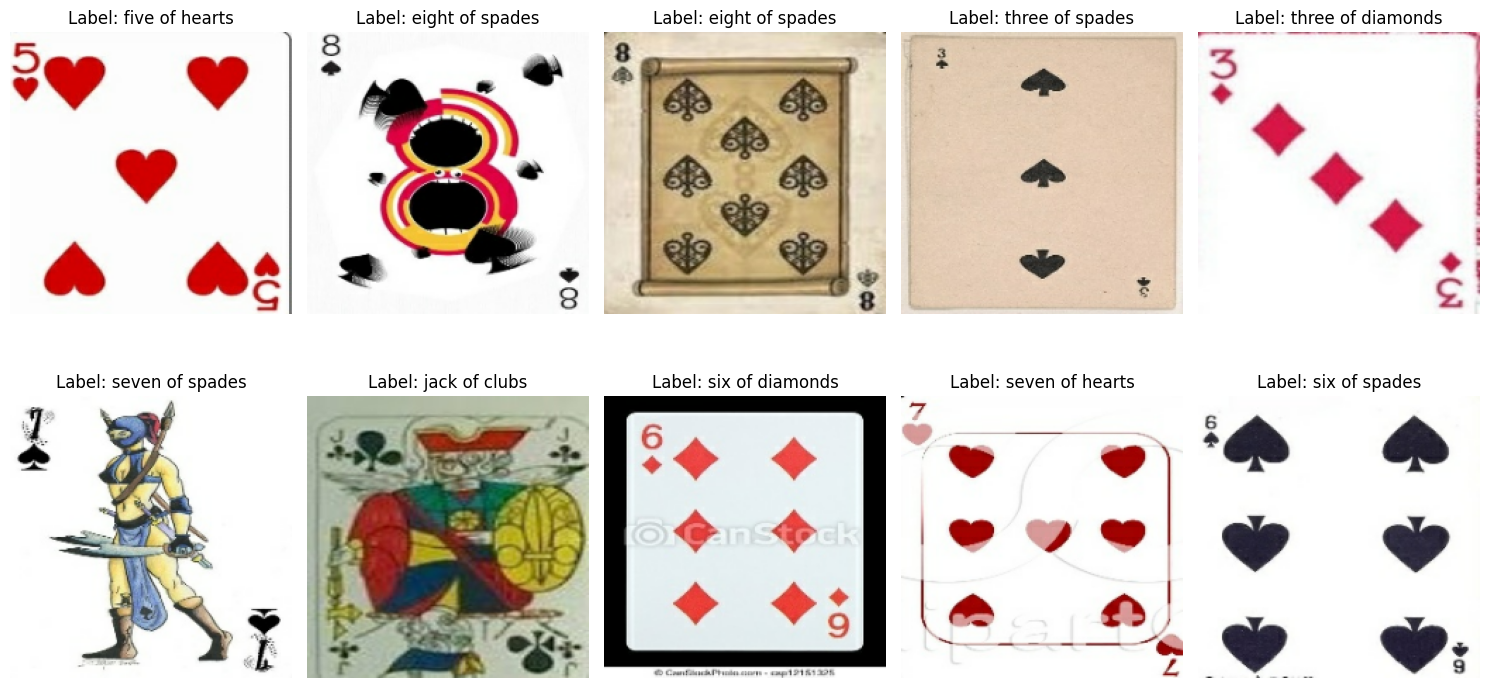

In [11]:
first_batch = next(iter(train))
images, labels = first_batch

plt.figure(figsize=(15, 8))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))  # Convert to uint8 for display
    plt.title(f"Label: {train.class_names[labels[i].numpy()]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

<div style="text-align: center; padding: 20px; background-color: #f9f9f9; border-radius: 15px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 2.5em; color: #4CAF50;">Thank You for Exploring! 🙌</h1>
    <p style="font-size: 1.2em; color: #555;">
        I hope this notebook has been helpful in your journey of working with image datasets on Kaggle. 🖼️✨
        If you found it useful or learned something new, don't forget to show some love by <strong>upvoting</strong> this notebook! ❤️
    </p>
    <p style="font-size: 1.1em; color: #555;">
        Your support motivates me to create more content for the Kaggle community. 🌟
    </p>
    <div style="margin-top: 20px;">
        <div style="text-decoration: none; padding: 10px 20px; font-size: 1.2em; color: white; background: linear-gradient(45deg, #4CAF50, #81C784); border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
            ⭐ Upvote This Notebook ⭐
        </div>
    </div>
    <p style="font-size: 1em; color: #777; margin-top: 20px;">
        Let’s keep learning and building amazing projects together! 🚀
    </p>
</div>
